# Imports

In [20]:
# %matplotlib notebook
%matplotlib inline

import litstudy.plot
import litstudy.common
import litstudy.search
import litstudy.nlp

from importlib import reload

# import logging
# logging.getLogger().setLevel(logging.INFO)

# One-time scopus configuration file setup
# pybliometrics.scopus.utils.create_config()

# Parameters

In [21]:
query = 'title-abs-key("predictive maintenance" AND "deep learning")'

# Plot statistics

100%|██████████| 44/44 [00:00<00:00, 225.12it/s]


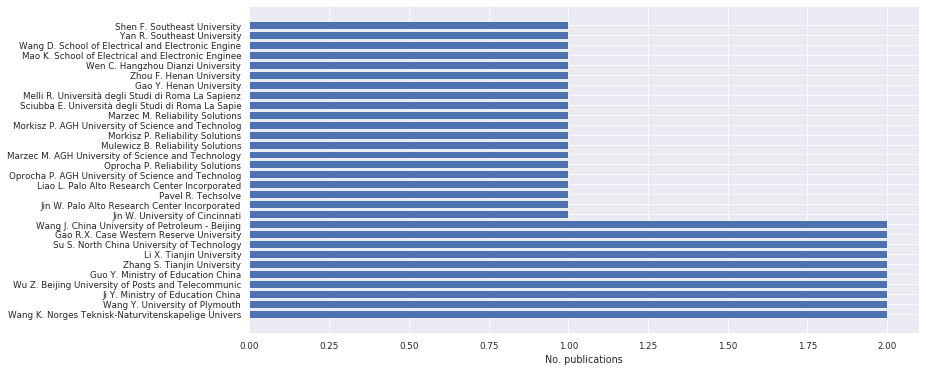

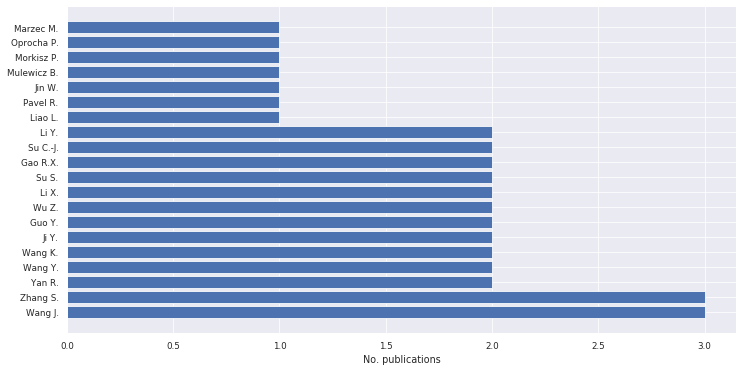

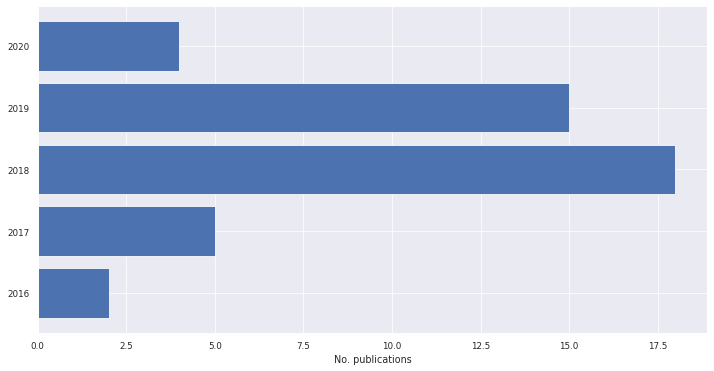

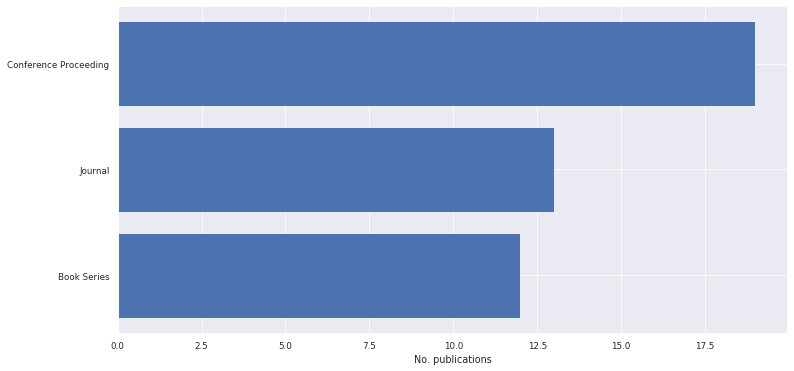

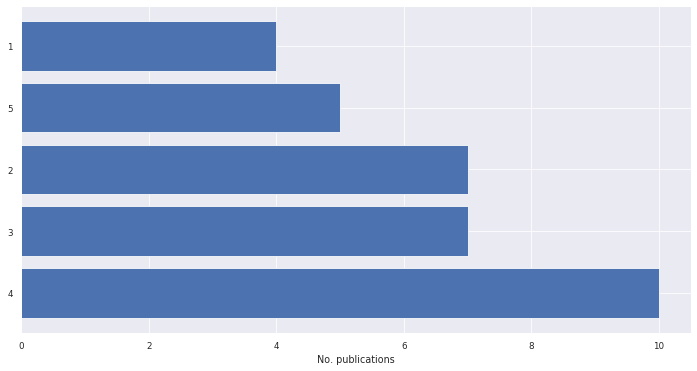

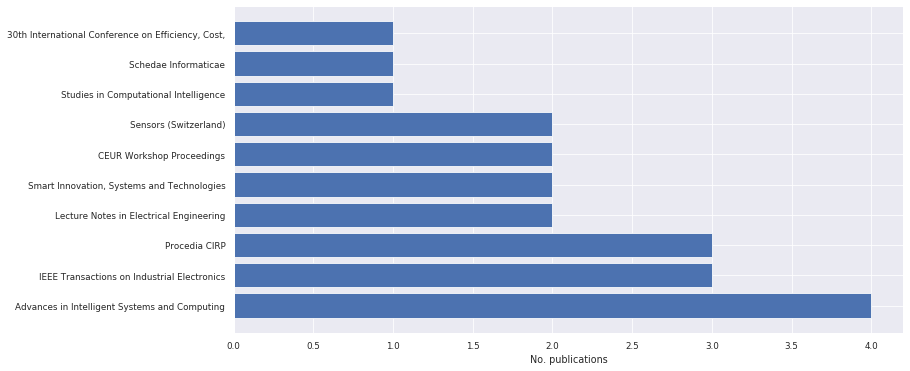

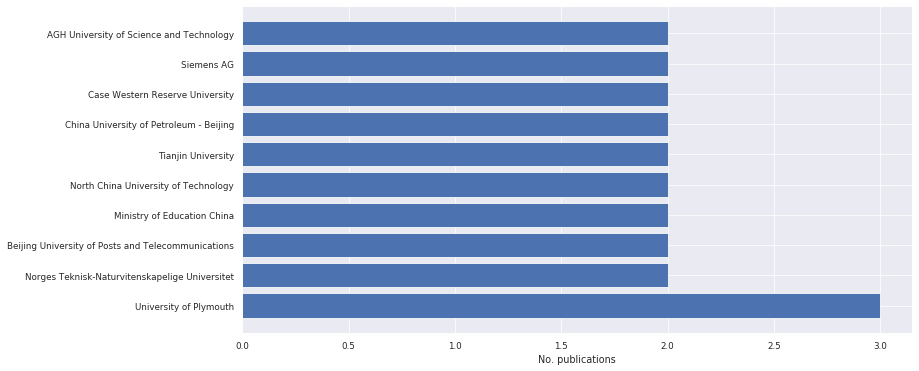

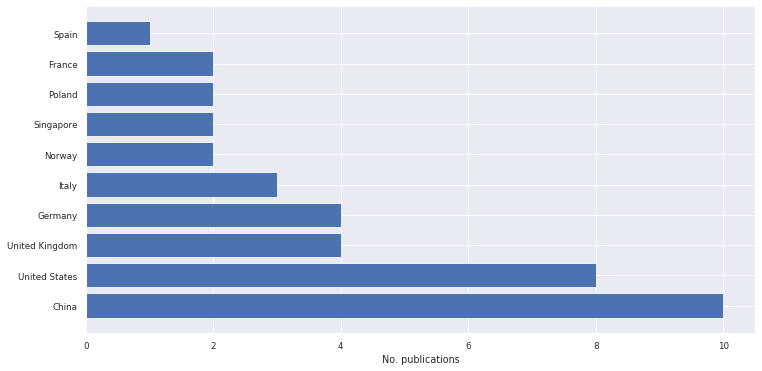

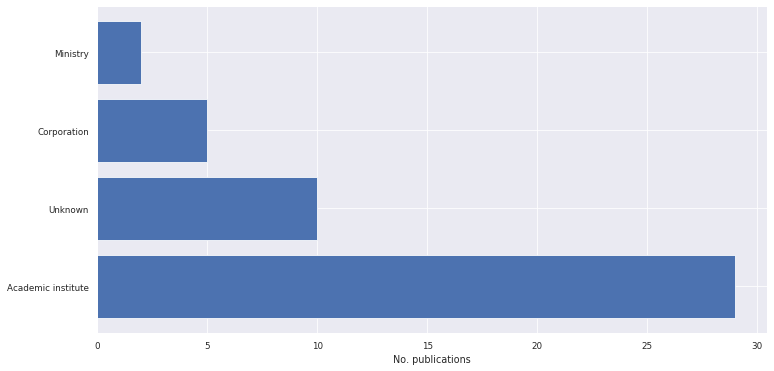

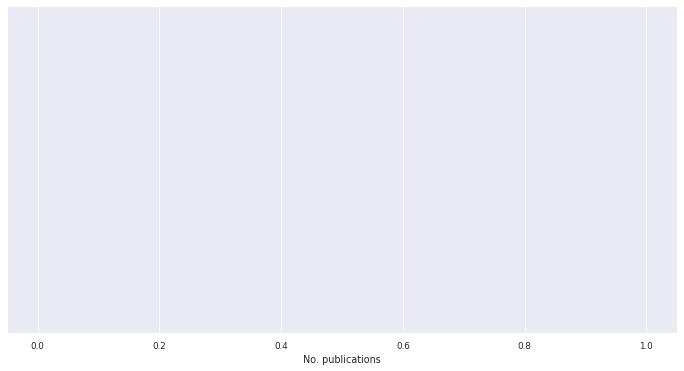

In [22]:
reload(litstudy.plot)
reload(litstudy.common)
reload(litstudy.search)
reload(litstudy.nlp)

docset = litstudy.search.search_scopus(query)
# docset = litstudy.search.search_mockup()

litstudy.plot.plot_author_affiliation_histogram(docset)
litstudy.plot.plot_author_histogram(docset)
litstudy.plot.plot_year_histogram(docset)
litstudy.plot.plot_source_type_histogram(docset)
litstudy.plot.plot_number_authors_histogram(docset)
litstudy.plot.plot_source_histogram(docset)
litstudy.plot.plot_affiliation_histogram(docset)
litstudy.plot.plot_country_histogram(docset)
litstudy.plot.plot_affiliation_type_histogram(docset)
litstudy.plot.plot_language_histogram(docset)

# Train topic models

In [33]:
reload(litstudy.nlp)
dic, freqs = litstudy.nlp.build_corpus_simple(docset)

# nmf_model = litstudy.nlp.train_nmf_model(dic, freqs, num_topics=4, passes=500)
nmf_model = litstudy.nlp.train_nmf_model(dic, freqs, num_topics=4)
lda_model = litstudy.nlp.train_lda_model(dic, freqs, num_topics=9)

# Plot frequent words, topic clouds and distribution

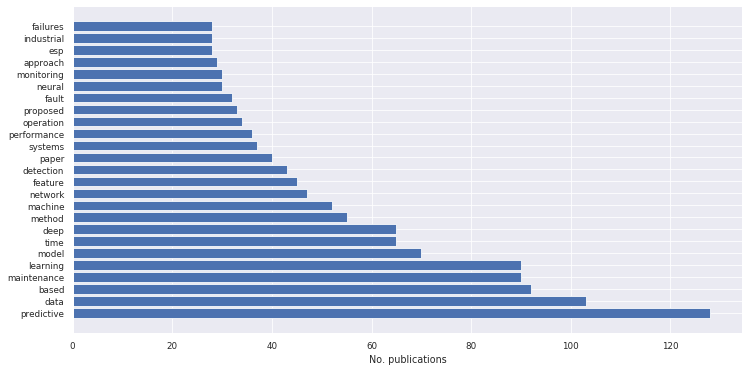

[t-SNE] Computing 43 nearest neighbors...
[t-SNE] Indexed 44 samples in 0.000s...
[t-SNE] Computed neighbors for 44 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 44 / 44
[t-SNE] Mean sigma: 0.428138
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.607555
[t-SNE] KL divergence after 1000 iterations: 0.370487


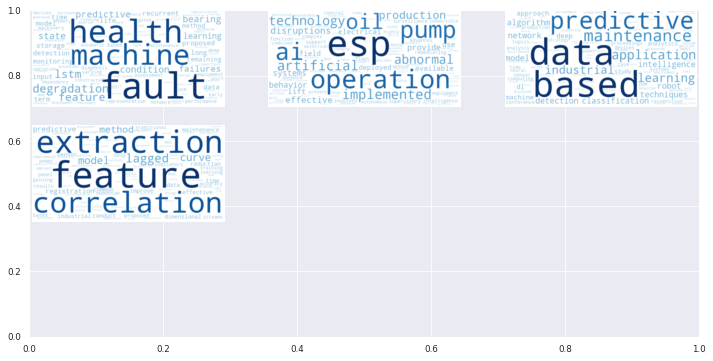

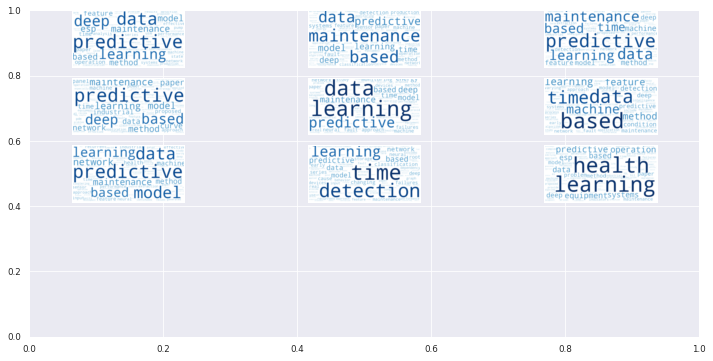

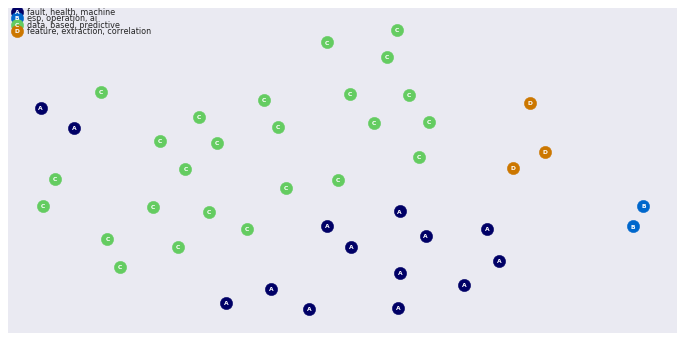

In [35]:
litstudy.plot.plot_words_histogram(freqs, dic)

litstudy.nlp.plot_topic_clouds(nmf_model)
litstudy.nlp.plot_topic_clouds(lda_model)

litstudy.nlp.plot_topic_distribution(nmf_model, dic, freqs)